In [15]:
%load_ext autoreload
%autoreload 2

In [44]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join("..", "src", "utils")))
sys.path.append(os.path.abspath(os.path.join("..", "src")))


In [45]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from genome import get_chromosome_lengths, parse_gff_old, get_chromosome_valid_genes,get_upstream_window_coordinates, get_gene_sequence,extract_snippets_from_upstream
import pandas as pd
from pathlib import Path
from utils.io import HDFReader

In [3]:
data_path = "max_positions_log.csv"
fasta_path = "../data/genome/fasta_file.fsa"

In [4]:
FASTA_CHROMOSOME_RENAME_MAP = {
    "ref|NC_001133|": "chrI",
    "ref|NC_001134|": "chrII",
    "ref|NC_001135|": "chrIII",
    "ref|NC_001136|": "chrIV",
    "ref|NC_001137|": "chrV",
    "ref|NC_001138|": "chrVI",
    "ref|NC_001139|": "chrVII",
    "ref|NC_001140|": "chrVIII",
    "ref|NC_001141|": "chrIX",
    "ref|NC_001142|": "chrX",
    "ref|NC_001143|": "chrXI",
    "ref|NC_001144|": "chrXII",
    "ref|NC_001145|": "chrXIII",
    "ref|NC_001146|": "chrXIV",
    "ref|NC_001147|": "chrXV",
    "ref|NC_001148|": "chrXVI",
    "ref|NC_001224|": "chrM",
}

In [5]:

cds_coords = parse_gff_old("../data/genome/gff_file.gff")

In [6]:
cds_coords

defaultdict(dict,
            {'YAL069W': {'chromosome': 'chrI',
              'strand': '+',
              'coordinates': [(334, 649)]},
             'YAL068W-A': {'chromosome': 'chrI',
              'strand': '+',
              'coordinates': [(537, 792)]},
             'YAL068C': {'chromosome': 'chrI',
              'strand': '-',
              'coordinates': [(1806, 2169)]},
             'YAL067W-A': {'chromosome': 'chrI',
              'strand': '+',
              'coordinates': [(2479, 2707)]},
             'YAL067C': {'chromosome': 'chrI',
              'strand': '-',
              'coordinates': [(7234, 9016)]},
             'YAL066W': {'chromosome': 'chrI',
              'strand': '+',
              'coordinates': [(10090, 10399)]},
             'YAL065C': {'chromosome': 'chrI',
              'strand': '-',
              'coordinates': [(11564, 11951)]},
             'YAL064W-B': {'chromosome': 'chrI',
              'strand': '+',
              'coordinates': [(12045, 12426)]}

In [24]:


data_path_base = Path("max_positions_log.csv")
all_files = [data_path_base] + sorted(data_path_base.parent.glob(f"{data_path_base.stem}_*.csv"))

dfs = []

for i, file in enumerate(all_files):
    #print(file)
    df = pd.read_csv(file)
    #print(df)
    df["fold"] = i  # 0 = original, 1 = _1, 2 = _2, ...
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)


In [25]:
df

,epoch,gene,condition,max_position,max_value,fold
0,0,YAL001C,0,438,0.144949,0
1,0,YAL001C,1,365,0.157172,0
2,0,YAL001C,2,477,0.475495,0
3,0,YAL001C,3,466,0.497822,0
4,0,YAL001C,4,436,0.136284,0
...,...,...,...,...,...,...
120685,0,YLR129W,13,102,0.713882,4
120686,0,YLR129W,14,349,0.422128,4
120687,0,YLR129W,15,451,0.584069,4
120688,0,YLR129W,16,484,0.317814,4


In [26]:
 upstream_window_coordinates = get_upstream_window_coordinates(cds_coords["YCR095C"], 500)

In [27]:
 upstream_window_coordinates

(289258, 289758, '-')

In [28]:
gene_data = {
    'chromosome': 'chrI',
    'strand': '+',
    'coordinates': [(37, 537)]
}

seq = get_gene_sequence(gene_data,fasta_path , rename_map=FASTA_CHROMOSOME_RENAME_MAP)
print(seq)
print(len(seq))

ACCACACCACACCCACACACACACATCCTAACACTACCCTAACACAGCCCTAATCTAACCCTGGCCAACCTGTCTCTCAACTTACCCTCCATTACCCTGCCTCCACTCGTTACCCTGTCCCATTCAACCATACCACTCCGAACCACCATCCATCCCTCTACTTACTACCACTCACCCACCGTTACCCTCCAATTACCCATATCCAACCCACTGCCACTTACCCTACCATTACCCTACCATCCACCATGACCTACTCACCATACTGTTCTTCTACCCACCATATTGAAACGCTAACAAATGATCGTAAATAACACACACGTGCTTACCCTACCACTTTATACCACCACCACATGCCATACTCACCCTCACTTGTATACTGATTTTACGTACGCACACGGATGCTACAGTATATACCATCTCAAACTTACCCTACTCTCAGATTCCACTTCACTCCATGGCCCATCTCTCACTGAATCAGTACCAAATGCACTCACATCATT
500


In [29]:
df["snippet"]= ""

In [30]:
df = extract_snippets_from_upstream(df, cds_coords, fasta_path, FASTA_CHROMOSOME_RENAME_MAP)


KeyboardInterrupt: 

In [31]:
df

,epoch,gene,condition,max_position,max_value,fold,snippet
0,0,YAL001C,0,438,0.144949,0,ATGTCTCATTCTCCTTTTCGGCTCCGTTTAGGTGATAAAC
1,0,YAL001C,1,365,0.157172,0,ACTGACGATTTATCCTGACGAACTCGTACAAATAGTGTCT
2,0,YAL001C,2,477,0.475495,0,CGTACTATATTGTGAAAGATTATTTACTAACGACACATTG
3,0,YAL001C,3,466,0.497822,0,TAGGTGATAAACGTACTATATTGTGAAAGATTATTTACTA
4,0,YAL001C,4,436,0.136284,0,TCATGTCTCATTCTCCTTTTCGGCTCCGTTTAGGTGATAA
...,...,...,...,...,...,...,...
120685,0,YLR129W,13,102,0.713882,4,
120686,0,YLR129W,14,349,0.422128,4,
120687,0,YLR129W,15,451,0.584069,4,
120688,0,YLR129W,16,484,0.317814,4,


<Axes: xlabel='max_position', ylabel='Count'>

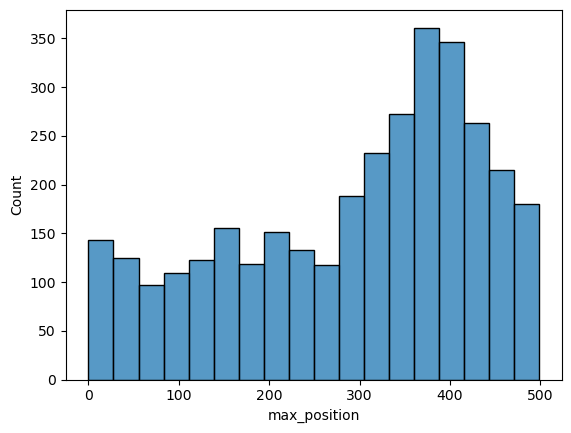

In [33]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

def plot_epoch_evolution(df, bins=50, n_plots=5):
    epochs = sorted(df["epoch"].unique())
    selected_epochs = np.linspace(0, max(epochs), n_plots, dtype=int)

    fig, axes = plt.subplots(1, n_plots, figsize=(n_plots * 4, 3), sharex=True, sharey=True)

    for i, epoch in enumerate(selected_epochs):
        ax = axes[i]
        sb.histplot(df[df.epoch == epoch]["max_position"], bins=bins, ax=ax)
        ax.set_title(f"Epoch {epoch}")
        ax.set_xlabel("")

    axes[0].set_ylabel("Count")
    plt.tight_layout()
    plt.show()


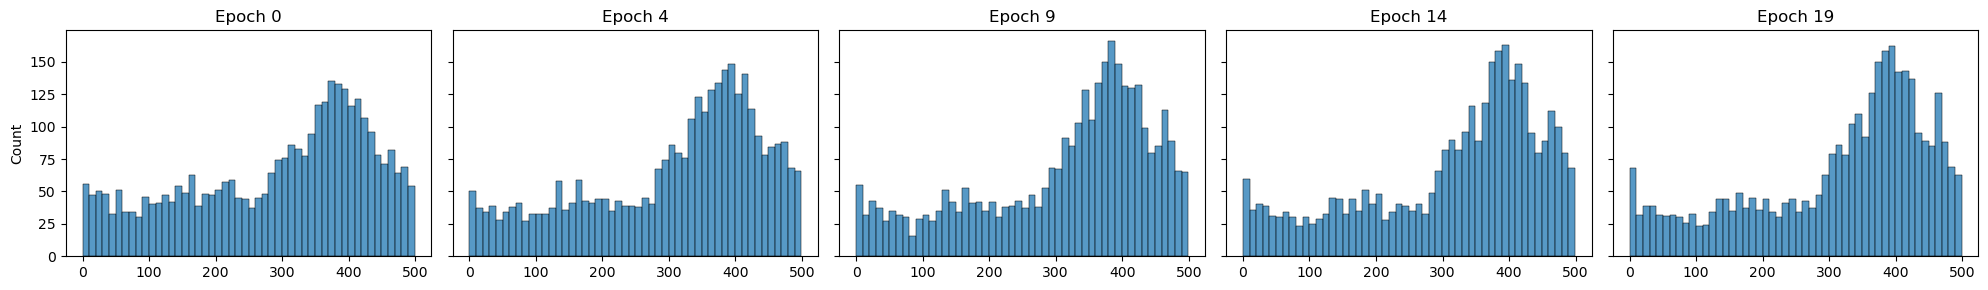

In [35]:
plot_epoch_evolution(df)


In [32]:
conditions_names = pd.read_csv("../data/condition.csv")

In [33]:
conditions_names

,condition,desc,samples
0,exponential growth,YPAD medium,"K01sl,K02sl,K01sl_2"
1,salt,1M salt for 45 minutes,"K03sl,K04sl"
2,DNA damage,1mM MMS for 1 hour,"K05sl,K06sl"
3,alpha factor,2.5mM for 45 minutes; add another 50µL to 25mL...,"K07sl,K08sl"
4,sorbitol,1M sorbitol for 45 minutes,"K09sl,K10sl"
5,oxidative stress,0.4M H2O2 for 45 minutes,"K11sl,K12sl"
6,heat shock,in 37°C shaker for 1 hour,"K13sl,K14sl"
7,stationary phase,18 days in 30°C incubator,"K15sl,K16sl"
8,sc. media,synthetic complete medium,"K17sl,K18sl"
9,sc glycerol media,4% glycerol instead of glucose in sc medium,"K19sl,K20sl"


In [34]:
def map_condition_indices_to_names(df, conditions_df):
    condition_map = conditions_df["condition"].to_dict()
    df["condition_name"] = df["condition"].map(condition_map)
    return df


In [35]:
# Assuming `df` has a 'sample' column and your condition info is in `conditions_df`
df = map_condition_indices_to_names(df, conditions_names)


In [36]:
import matplotlib.pyplot as plt
import seaborn as sb

def plot_first_last_per_condition(df, bins=50):
    conditions = df["condition_name"].unique()
    max_epoch = df["epoch"].max()

    n_conditions = len(conditions)
    fig, axes = plt.subplots(n_conditions, 2, figsize=(10, 3 * n_conditions), sharex=False, sharey=True)

    if n_conditions == 1:
        axes = axes.reshape(1, 2)  # handle single-condition case

    for i, condition in enumerate(conditions):
        for j, epoch in enumerate([0, max_epoch]):
            ax = axes[i, j]
            data = df[(df["condition_name"] == condition) & (df["epoch"] == epoch)]["max_position"]
            sb.histplot(data, bins=bins, ax=ax)
            ax.set_title(f"Condition {condition} — Epoch {epoch}")
            ax.set_xlabel("max_position")
            if j == 0:
                ax.set_ylabel("Count")

    plt.tight_layout()
    plt.show()


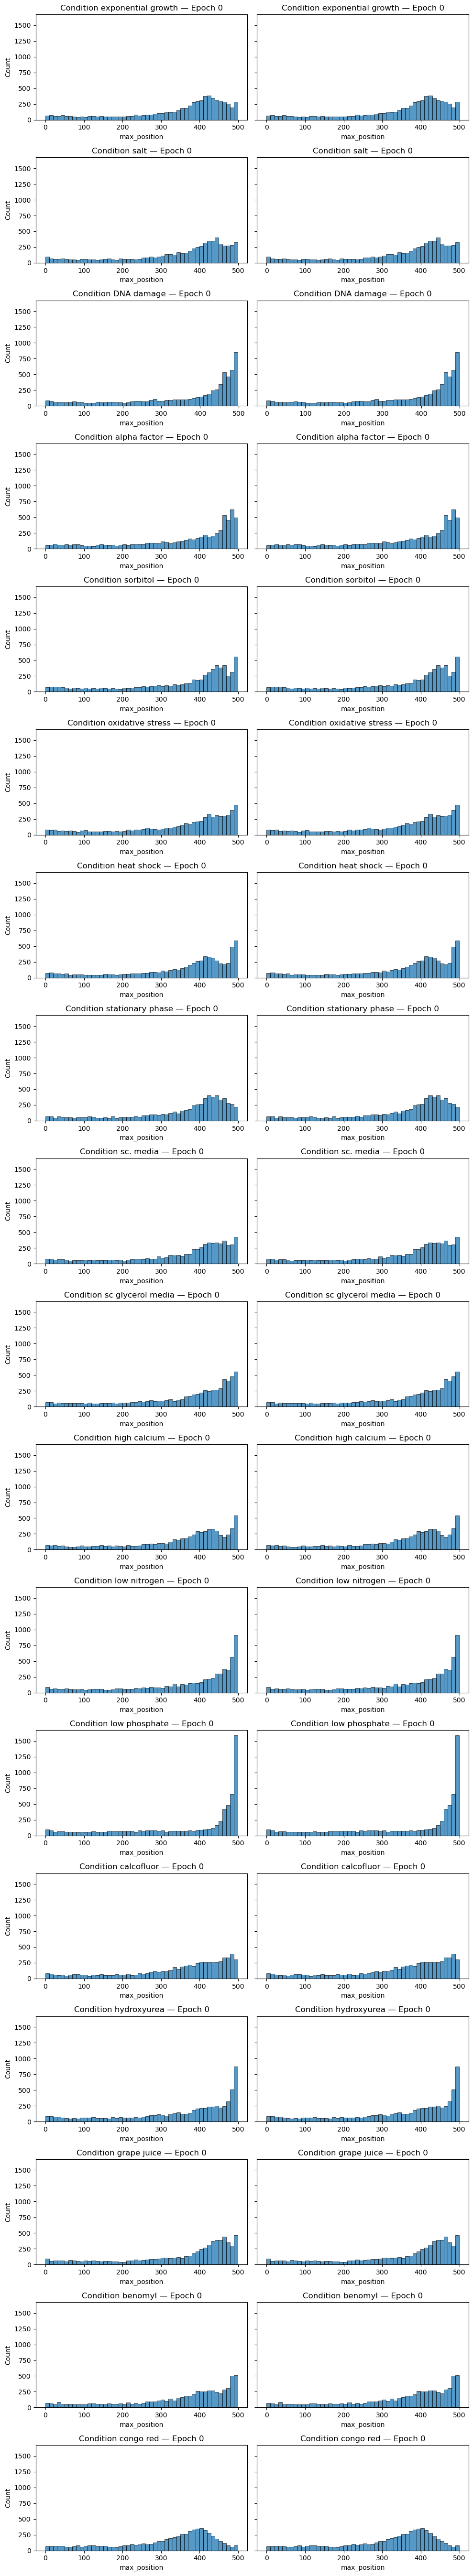

In [37]:
plot_first_last_per_condition(df)


In [89]:
write_snippets_fasta(df_filtered, path="snippets.fasta")

In [46]:
h5_reader = HDFReader("../data/processed/genewise.h5")

In [50]:
emb, expr = h5_reader["YAL001C"]

In [53]:
import numpy as np
import anndata as ad

def maxpos_embeddings_to_anndata(df, reader):
    """
    Build an AnnData object whose X-matrix contains the embedding vector at each
    row’s `max_position`, while `df` itself becomes the .obs table.

    Parameters
    ----------
    df : pandas.DataFrame
        Must contain at least the columns:
        - "gene"         : gene id (same key used in `reader`)
        - "max_position" : integer index into the embedding window
    reader : HDFReader
        Your wrapper for the HDF5 file; `reader[gene]` returns (embedding, expr).

    Returns
    -------
    anndata.AnnData
        .X : shape (len(df), 768) — one 768-dim vector per row in `df`
        .obs : copy of `df` (index reset)
    """
    # 1) cache embeddings per gene to avoid repeated I/O
    emb_cache = {}
    for gene in df["gene"].unique():
        emb_cache[gene], _ = reader[gene]    # emb shape: (window_size, 768)

    # 2) allocate X (rows = df rows, cols = 768)
    n_rows = len(df)
    n_features = emb_cache[next(iter(emb_cache))].shape[1]   # 768
    X = np.empty((n_rows, n_features), dtype=np.float32)

    # 3) fill X with the vector at each max_position
    for i, row in df.iterrows():
        gene_emb = emb_cache[row["gene"]]
        X[i] = gene_emb[int(row["max_position"])]

    # 4) build AnnData
    adata = ad.AnnData(
        X=X,
        obs=df.reset_index(drop=True).copy()
    )
    return adata


In [55]:
adata = maxpos_embeddings_to_anndata(df, h5_reader)

C:\Users\49176\anaconda3\envs\single_cell\Lib\site-packages\anndata\_core\aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [56]:
adata

AnnData object with n_obs × n_vars = 120690 × 768
    obs: 'epoch', 'gene', 'condition', 'max_position', 'max_value', 'fold', 'snippet', 'condition_name'

In [57]:
adata.write_h5ad("max_positions.h5ad")

In [59]:
import scanpy as sc
sc.read_h5ad("max_positions.h5ad")

C:\Users\49176\anaconda3\envs\single_cell\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
C:\Users\49176\anaconda3\envs\single_cell\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
C:\Users\49176\anaconda3\envs\single_cell\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
C:\Users\49176\anaconda3\envs\single_cell\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
C:\Users\49176\anaconda3\envs\single_cell\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_mtx from `

AnnData object with n_obs × n_vars = 120690 × 768
    obs: 'epoch', 'gene', 'condition', 'max_position', 'max_value', 'fold', 'snippet', 'condition_name'